<a href="https://colab.research.google.com/github/simplifique-treinamentos/notebooks-python/blob/main/ExploreWorldBankData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Fernando Timoteo Fernandes <br />
Data: 15/06/2022 <br />

Sejam bem-vindos!

O **banco mundial (World Bank)** disponibiliza indicadores sociodemográficos como dados populacionais, Mortalidade, Saúde, PIB per Capita, HIV, etc. 
 
É uma fonte de dados interessante para iniciar seus estudos em data science.

Veja a seguir uma biblioteca escrita em pyhon (World Bank API  - **wbapi**) para consulta rápida e visualização de indicadores!
<br/><br/>
Ref: https://data.worldbank.org/


#1) Instalar o pacote do Banco Mundial (wbgapi)

In [1]:
!pip install wbgapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import wbgapi as wb
from IPython import display #usado para ajustar tamanho das células

# 2) Conhecendo a API

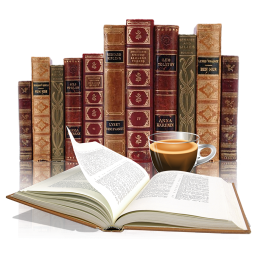

## 2.1) Recursos disponíveis (subpacotes)



* **series** - Indicadores e séries temporais (ex: SP.POP.TOTL - Dados populacionais)
* **economy** - Países e economias (ex: BRA, CHL e USA)
* **time** - Períodos (Ex: mensal, anual, quadrimestral)
* **source** -  Bases de Dados (World Development Indicators - WDI, Jobs, etc.)
* **region** - regiões segundo o Banco Mundial (ex: Latin America & Caribbean - LCN)
* **income** - Renda (High Income - HIC, Low Income - LIC, etc.)
* **topic** - Tópicos (ex: Poverty, Health, Education, etc.)
* **lending** - IDA (International Bank for Reconstruction and Development), IBDR, Blend, Not Classified

<br/>Atenção a este subpacote especial! <br/>
* **data** - consulta dados de combinações de séries, economias , períodos e pode retornar um ***DataFrame***

* Use-o para consultar e retornar um dataframe para iniciar a análise de dados


**Inicie buscando informações de um pacote para listar os recursos**

### 2.1.1) Verifique informações de cada pacote básico

**Lista de Séries (indicadores)** 

Ex: wb.series.info()

In [24]:
print(wb.series.info())

#limito o tamanho da célula para exibir os resultados
display.Javascript("google.colab.output.setIframeHeight('150');")

<IPython.core.display.Javascript object>

*Print do resultado para facilitar a leitura*
<br/>Obs: Rode a célula acima para ver o resultado completo

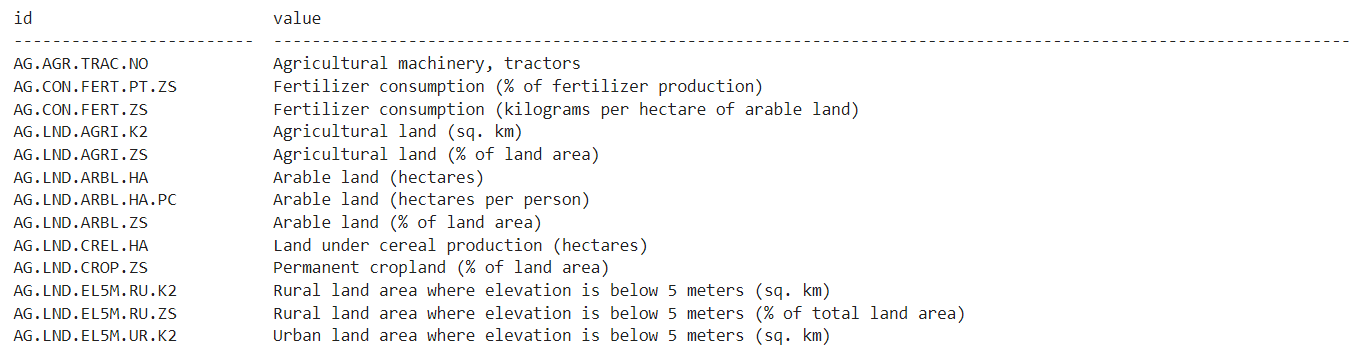

**Lista de Tópicos**

In [25]:
print(wb.topic.info())

#limito o tamanho da célula para exibir os resultados
display.Javascript("google.colab.output.setIframeHeight('150');")

id    value
----  -------------------------------
1     Agriculture & Rural Development
2     Aid Effectiveness
3     Economy & Growth
4     Education
5     Energy & Mining
6     Environment
7     Financial Sector
8     Health
9     Infrastructure
10    Social Protection & Labor
11    Poverty
12    Private Sector
13    Public Sector
14    Science & Technology
15    Social Development
16    Urban Development
17    Gender
18    Millenium development goals
19    Climate Change
20    External Debt
21    Trade
      21 elements


<IPython.core.display.Javascript object>

**Lista de países com indicadores econômicos**

In [26]:
print(wb.economy.info())

display.Javascript("google.colab.output.setIframeHeight('150px');")

<IPython.core.display.Javascript object>

*Print do resultado para facilitar a leitura*
<br/>Obs: Rode a célula acima para ver o resultado completo

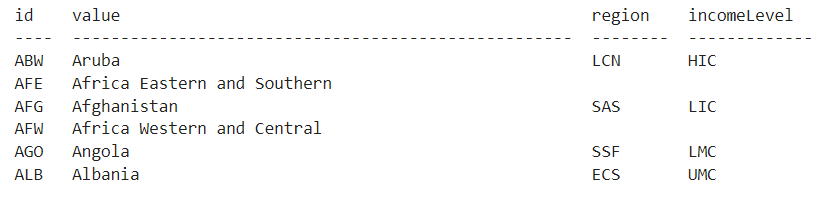

**Lista de Bases de Dados disponíveis**

In [27]:
print(wb.source.info())

display.Javascript("google.colab.output.setIframeHeight('150');")

<IPython.core.display.Javascript object>

*Print do resultado para facilitar a leitura*
<br/>Obs: Rode a célula acima para ver o resultado completo

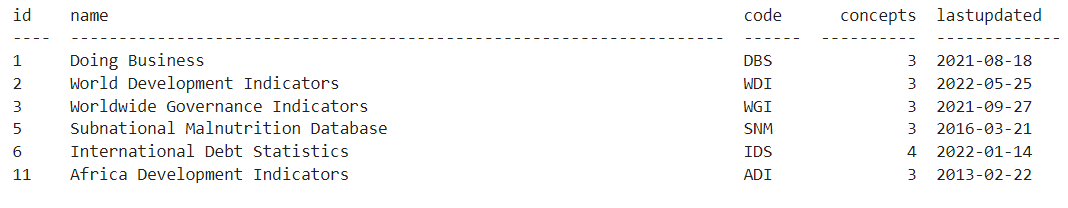

### 2.1.2) Indicadores de uma base de dados específica
Exemplo: Quais indicadores existe na base de dados de *World Development Indicators (WDI)* ? (base número 2)

In [28]:
print(wb.series.info(db=2))

display.Javascript("google.colab.output.setIframeHeight('150px');")

<IPython.core.display.Javascript object>

*Print do resultado para facilitar a leitura*
<br/>Obs: Rode a célula acima para ver o resultado completo

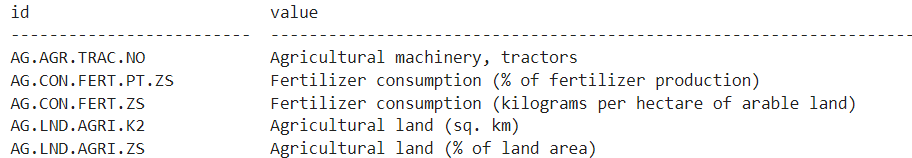

Exemplo: Quais indicadores da base de dados de Saúde?

In [31]:
print(wb.series.info(db=16))  #Health Nutrition and Population Statistics

display.Javascript("google.colab.output.setIframeHeight('150');")

<IPython.core.display.Javascript object>

*Print do resultado para facilitar a leitura*
<br/>Obs: Rode a célula acima para ver o resultado completo

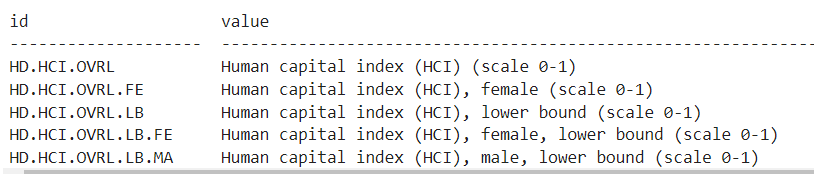

### 2.1.3) Filtro por um indicador específico

In [ ]:
wb.series.info('EN.ATM.PM25.MC.ZS') 

id,value
EN.ATM.PM25.MC.ZS,"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)"
,1 elements


<br /><br /><br />
Agora pare! pense! Respire!
<br /><br /><br />

## 2.2) Subpacote **data**
Pode retornar linhas como dicionários ou um pandas DataFrame

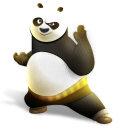

### 2.2.1) Fazer um request e retornar linhas como dicionários

In [ ]:
for row in wb.data.fetch('SP.POP.TOTL', 'BRA', time=range(2010,2022,2)): # 2010-2020 de 2 em 2 anos
    print(row)

{'value': 212559409, 'series': 'SP.POP.TOTL', 'economy': 'BRA', 'aggregate': False, 'time': 'YR2020'}
{'value': 209469320, 'series': 'SP.POP.TOTL', 'economy': 'BRA', 'aggregate': False, 'time': 'YR2018'}
{'value': 206163056, 'series': 'SP.POP.TOTL', 'economy': 'BRA', 'aggregate': False, 'time': 'YR2016'}
{'value': 202763744, 'series': 'SP.POP.TOTL', 'economy': 'BRA', 'aggregate': False, 'time': 'YR2014'}
{'value': 199287292, 'series': 'SP.POP.TOTL', 'economy': 'BRA', 'aggregate': False, 'time': 'YR2012'}
{'value': 195713637, 'series': 'SP.POP.TOTL', 'economy': 'BRA', 'aggregate': False, 'time': 'YR2010'}


### 2.2.2) Fazer um request e retornar um DataFrame

In [ ]:
wb.data.DataFrame(['NY.GDP.PCAP.CD', 'SP.POP.TOTL'], ['BRA','CHL'], mrv=5) #Dados dos últimos 5 anos (Brazil e Chile)

YR2016        YR2017        YR2018  \
economy series                                                     
BRA     NY.GDP.PCAP.CD  8.710063e+03  9.928676e+03  9.151382e+03   
        SP.POP.TOTL     2.061631e+08  2.078338e+08  2.094693e+08   
CHL     NY.GDP.PCAP.CD  1.375359e+04  1.499882e+04  1.588814e+04   
        SP.POP.TOTL     1.820907e+07  1.847044e+07  1.872917e+07   

                              YR2019        YR2020  
economy series                                      
BRA     NY.GDP.PCAP.CD  8.897553e+03  6.796845e+03  
        SP.POP.TOTL     2.110495e+08  2.125594e+08  
CHL     NY.GDP.PCAP.CD  1.474171e+04  1.323170e+04  
        SP.POP.TOTL     1.895204e+07  1.911621e+07

**Ficou em dúvida no código dos países, basta filtrar desta forma abaixo!
 =D**

### 2.2.3) Filtro por códigos de países

In [ ]:
wb.economy.coder(['Argentina', 'Brazil', 'Chile', 'US','China'])

ORIGINAL NAME,WBG NAME,ISO_CODE
Argentina,Argentina,ARG
Brazil,Brazil,BRA
Chile,Chile,CHL
US,United States,USA
China,China,CHN


## 2.3) Filtro por palavras específicas

**Filtro por indicadores de poluição** <br/><br/>

Ex: Filtro por material particulado com diâmetro inferior a 2,5 μm (Particulated Matter-PM2.5) que pode contribuir para aumento de óbitos. <br/>

Algumas referências sobre o assunto: <br/>
* https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health
* https://www.scielo.br/j/rbepid/a/PSsQZggMWfdFbpyYpqJ8pQs/?lang=pt
* https://www.science.org/doi/10.1126/sciadv.abf4491#:~:text=Ambient%20fine%20particulate%20matter%20air,3%20(3%E2%80%935).

In [ ]:
# partículas finas de poluição com 2.5 microns , which are capable of penetrating deep into the respiratory tract and causing severe health damage
print(wb.series.info(q='PM2.5'))

id                    value
--------------------  -----------------------------------------------------------------------------------------------
EN.ATM.PM25.MC.M3     PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
EN.ATM.PM25.MC.T1.ZS  PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)
EN.ATM.PM25.MC.T2.ZS  PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)
EN.ATM.PM25.MC.T3.ZS  PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)
EN.ATM.PM25.MC.ZS     PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
                      5 elements


In [ ]:
#Filtro os últimos 5 anos com valores não nulos (mrnev=5)
wb.data.DataFrame('EN.ATM.PM25.MC.ZS',economy=['BRA','MEX','CHL'], labels=True, mrnev=5)

,Country,YR2013,YR2014,YR2015,YR2016,YR2017
economy,,,,,,
BRA,Brazil,85.334714,77.116473,74.927752,67.952559,68.135030
MEX,Mexico,99.914866,99.762177,99.715266,99.656644,99.656127
CHL,Chile,99.302000,99.150452,98.576299,97.594419,97.663018


## 2.4) Consulto como usar um recurso

Percentual de população exposta a níveis que excedem os níveis da OMS

In [36]:
help(wb.data)

display.Javascript("google.colab.output.setIframeHeight('150px');")

<IPython.core.display.Javascript object>

*Print do resultado para facilitar a leitura*
<br/>Obs: Rode a célula acima para ver o resultado completo

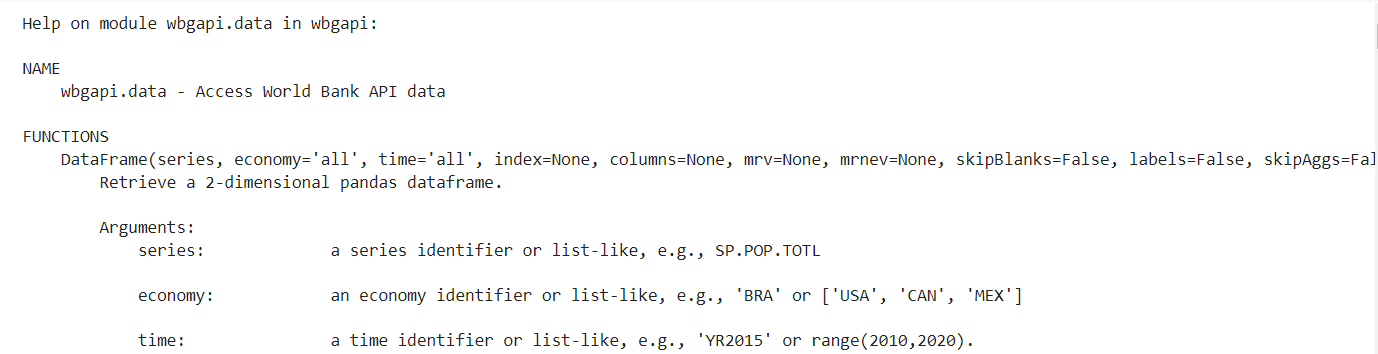

# 3) Gerar gráficos após a consulta

Você pode consultar os dados e visualizar em um dataframe para em seguida plotar!

## 3.1) Exemplo - Plotar dados de população exposta a poluição (PM2.5)

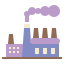

In [ ]:
#Como não há dados em 2018 para poluição (cfm item 2.3), ploto somente até 2017
df_poluicao = wb.data.DataFrame('EN.ATM.PM25.MC.ZS', ['BRA', 'MEX', 'CHL'],
                  range(2013, 2018,1), index='time')

df_poluicao

,BRA,CHL,MEX
time,,,
YR2013,85.334714,99.302000,99.914866
YR2014,77.116473,99.150452,99.762177
YR2015,74.927752,98.576299,99.715266
YR2016,67.952559,97.594419,99.656644
YR2017,68.135030,97.663018,99.656127


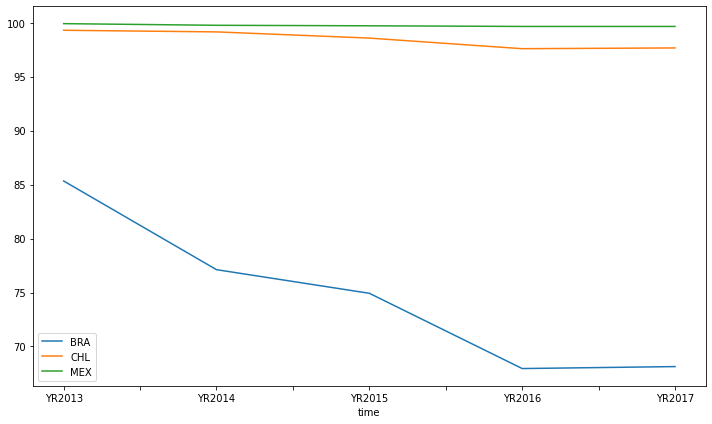

In [ ]:
df_poluicao.plot(figsize=(10, 6))
plt.show()

### 3.1.1) Dados de poluição com gráfico melhorado

Transformo YR2013, YR2014 em números (2013, 2014, etc.)

In [ ]:
df_poluicao_2 = wb.data.DataFrame('EN.ATM.PM25.MC.ZS', ['BRA', 'MEX', 'CHL'],
                  range(2013, 2018,1), numericTimeKeys=True, labels=True, index='time')

df_poluicao_2.sort_index(inplace=True)
df_poluicao_2

,Time,BRA,CHL,MEX
time,,,,
2013,2013,85.334714,99.302000,99.914866
2014,2014,77.116473,99.150452,99.762177
2015,2015,74.927752,98.576299,99.715266
2016,2016,67.952559,97.594419,99.656644
2017,2017,68.135030,97.663018,99.656127


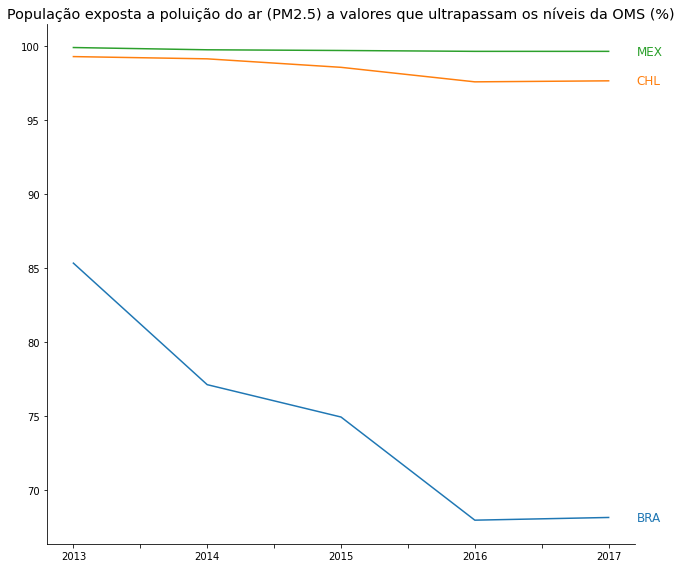

In [ ]:
#Expectativa de vida ao nascer
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True


ax1 = df_poluicao_2.plot(x='Time', title='População exposta a poluição do ar (PM2.5) a valores que ultrapassam os níveis da OMS (%)')

#Crio um iterator para as tuplas de linhas e colunas
#print(tuple(zip(ax.lines, df_expec.columns)))

for linha, nome_pais in zip(ax1.lines, df_poluicao_2.columns[1:4]):
		y = linha.get_ydata()[-1] # Pego a linha

		#Insiro um texto com o nome do país ao lado de cada linha
		ax1.annotate(nome_pais, xy=(1, y), xytext=(1, 0),
								color=linha.get_color(), xycoords=ax1.get_yaxis_transform(),
								textcoords="offset points", size=12, va="center")

#Oculto a caixa da legenda
ax1.legend().set_visible(False)

#Aumento a fonte do título
ax1.title.set_fontsize('x-large')

# Oculto o topo e o lado direito da caixa do gráfico
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set(xlabel=None)

plt.show()

## 3.2) Outros gráficos comparativos

Visualizo os dados do Dataframe antes de plotar

In [ ]:
wb.data.DataFrame(['NY.GDP.PCAP.CD'], ['BRA','ARG'], range(2010,2022,5))

,YR2010,YR2015,YR2020
economy,,,
ARG,10385.964432,13789.060425,8579.017773
BRA,11286.071540,8813.989806,6796.844542


In [ ]:
wb.data.DataFrame(['SP.POP.TOTL'], ['BRA','ARG'], range(2010,2022,5))

,YR2010,YR2015,YR2020
economy,,,
ARG,40788453.0,43131966.0,45376763.0
BRA,195713637.0,204471759.0,212559409.0



*   Dados populacionais
  * https://data.worldbank.org/indicator/SP.POP.TOTL

*   PIB per capita
  * https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
 

### 3.2.1) PIB per Capita

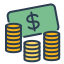

In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD',
	economy = ['BRA','ARG','CHL'],
	time=range(2010,2022,2), numericTimeKeys=True,labels=True)

,Country,2010,2012,2014,2016,2018,2020
economy,,,,,,,
CHL,Chile,12808.038340,15351.540739,14670.988914,13753.592149,15888.144355,13231.704207
ARG,Argentina,10385.964432,13082.664326,12334.798245,12790.242473,11795.159387,8579.017773
BRA,Brazil,11286.071540,12370.223255,12112.834955,8710.063290,9151.381732,6796.844542


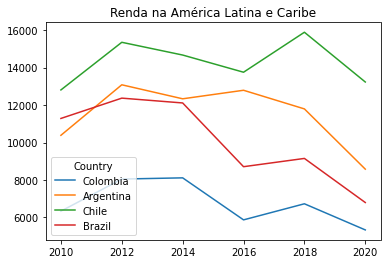

In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD',
	economy = ['BRA','CHL','ARG', 'COL'],
	time=range(2010,2022,2), numericTimeKeys=True,labels=True).set_index('Country').transpose().plot(title='Renda na América Latina e Caribe')

### 3.2.2) Expectativa de vida ao nascer

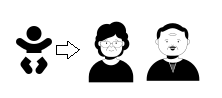

In [ ]:
#Expectativa de vida ao nascer
wb.data.DataFrame('SP.DYN.LE00.IN',
	economy = ['BRA','ARG','CHL'],
	time=range(2010,2022,2), numericTimeKeys=True,labels=True)

,Country,2010,2012,2014,2016,2018,2020
economy,,,,,,,
CHL,Chile,78.779,79.176,79.504,79.779,80.042,80.329
ARG,Argentina,75.278,75.598,75.913,76.221,76.520,76.813
BRA,Brazil,73.619,74.209,74.745,75.230,75.672,76.084


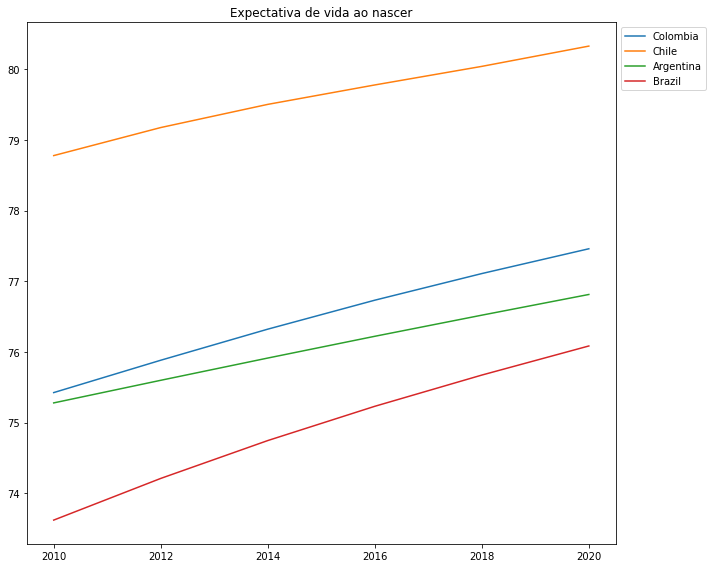

In [ ]:
#Expectativa de vida ao nascer
ax = wb.data.DataFrame('SP.DYN.LE00.IN',
	economy = ['BRA','ARG','CHL','COL'], 
	labels = True,
	time=range(2010,2022,2), numericTimeKeys=True).set_index('Country').transpose().plot(title='Expectativa de vida ao nascer' )
 
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### 3.2.3) Expectativa de vida ao nascer (gráfico melhorado)

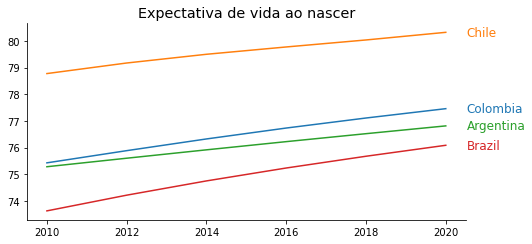

In [ ]:
#Expectativa de vida ao nascer
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df_expec = wb.data.DataFrame('SP.DYN.LE00.IN',
	economy = ['BRA','ARG','CHL','COL'], 
	labels = True,
	time=range(2010,2022,2), numericTimeKeys=True).set_index('Country').transpose()
 
ax = df_expec.plot(title='Expectativa de vida ao nascer')

#Crio um iterator para as tuplas de linhas e colunas
#print(tuple(zip(ax.lines, df_expec.columns)))

for linha, nome_pais in zip(ax.lines, df_expec.columns):
		y = linha.get_ydata()[-1] # Pego a linha

		#Insiro um texto com o nome do país ao lado da linha
		ax.annotate(nome_pais, xy=(1, y), xytext=(1, 0),
								color=linha.get_color(), xycoords=ax.get_yaxis_transform(),
								textcoords="offset points", size=12, va="center")

#Oculto a caixa da legenda
ax.legend().set_visible(False)

#Aumento a fonte do título
ax.title.set_fontsize('x-large')

# Oculto o topo e o lado direito da caixa do gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

### 3.2.4) População Total

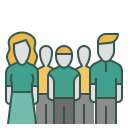

In [ ]:
#Popupação dos países da América latina e caribe
wb.data.DataFrame('SP.POP.TOTL',economy = ['BRA','ARG','CHL','COL'], time=range(2010, 2022, 5))

,YR2010,YR2015,YR2020
economy,,,
ARG,40788453.0,43131966.0,45376763.0
BRA,195713637.0,204471759.0,212559409.0
CHL,17062531.0,17969356.0,19116209.0
COL,45222699.0,47520667.0,50882884.0


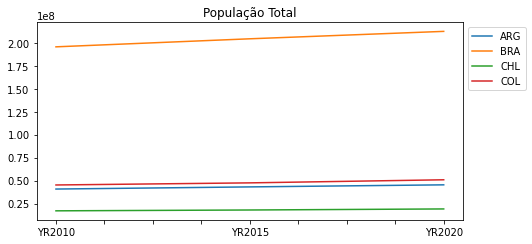

In [ ]:
ax = wb.data.DataFrame('SP.POP.TOTL',economy = ['BRA','ARG','CHL','COL'], time=range(2010, 2022, 5)).transpose().plot(title='População Total')

ax.legend(loc="upper left", bbox_to_anchor=(1,1))

# 4) Referências

Mais informações em: 

*   https://data.worldbank.org/

*   https://blogs.worldbank.org/opendata/

*   https://pypi.org/project/wbgapi/

*   https://nbviewer.org/github/tgherzog/wbgapi/blob/master/examples/wbgapi-cookbook.ipynb (Muito bom!)

*   https://blogs.worldbank.org/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data



Obrigado!